# Data Preparation

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [146]:
data = pd.read_csv("small.csv")
data = data.drop("duration",axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


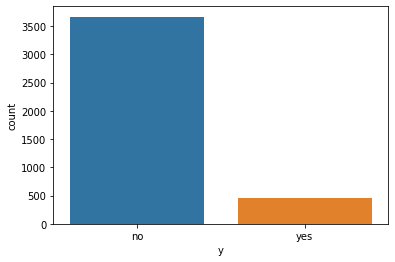

In [147]:
sns.countplot(x='y',data=data)

### Data is imbalanced, So balancing of data set is done by making multiple copies of same data having "**yes**" as output

In [0]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

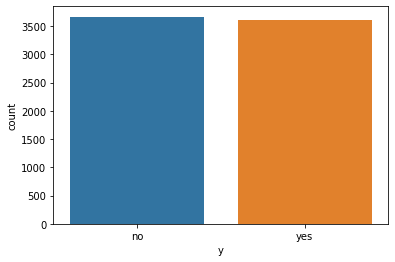

In [149]:
sns.countplot(x='y',data=data)


# Analysis of Features

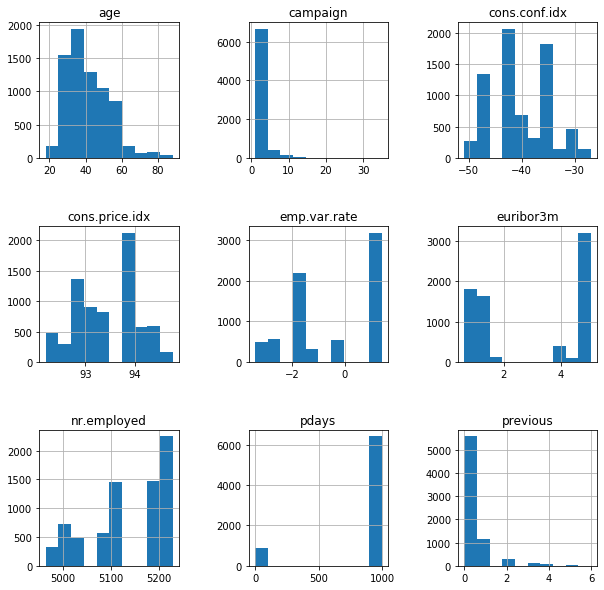

In [150]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()


In [151]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,30,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,30,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,30,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,30,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,30,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [152]:
data.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [0]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [154]:
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.171429,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,0.029412,1.0,0.0,nonexistent,0.333333,0.269680,0.192469,0.153741,0.512287,no,0
1,0.300000,services,single,high.school,no,no,no,telephone,may,fri,0.088235,1.0,0.0,nonexistent,0.937500,0.698753,0.602510,0.956916,0.859735,no,0
2,0.100000,services,married,high.school,no,yes,no,telephone,jun,wed,0.000000,1.0,0.0,nonexistent,1.000000,0.882307,0.376569,0.981179,1.000000,no,0
3,0.285714,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,0.058824,1.0,0.0,nonexistent,1.000000,0.882307,0.376569,0.980499,1.000000,no,0
4,0.414286,admin.,married,university.degree,no,yes,no,cellular,nov,mon,0.000000,1.0,0.0,nonexistent,0.687500,0.389322,0.368201,0.806349,0.877883,no,0


In [0]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [156]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.171429,1,-1,1,0.029412,1.0,0.0,0,0.333333,0.269680,0.192469,0.153741,0.512287,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.300000,1,1,1,0.088235,1.0,0.0,0,0.937500,0.698753,0.602510,0.956916,0.859735,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.100000,1,-1,1,0.000000,1.0,0.0,0,1.000000,0.882307,0.376569,0.981179,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.285714,1,0,0,0.058824,1.0,0.0,0,1.000000,0.882307,0.376569,0.980499,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.414286,1,-1,1,0.000000,1.0,0.0,0,0.687500,0.389322,0.368201,0.806349,0.877883,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [157]:
dataProcessed.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [0]:
dataframe=dataProcessed

# Applying Logistic Regression

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [160]:
dataframe.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.171429,1,-1,1,0.029412,1.0,0.0,0,0.333333,0.269680,0.192469,0.153741,0.512287,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.300000,1,1,1,0.088235,1.0,0.0,0,0.937500,0.698753,0.602510,0.956916,0.859735,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.100000,1,-1,1,0.000000,1.0,0.0,0,1.000000,0.882307,0.376569,0.981179,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.285714,1,0,0,0.058824,1.0,0.0,0,1.000000,0.882307,0.376569,0.980499,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.414286,1,-1,1,0.000000,1.0,0.0,0,0.687500,0.389322,0.368201,0.806349,0.877883,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [161]:
dataframe.shape

(7276, 56)

In [0]:
# Saperating features and result vectors
X = dataframe.drop('y', axis=1).values
y = dataframe['y'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45,stratify=y)

In [164]:
print(" Training Dimnesion", X_train.shape)
print(" Testing Dimnesion", X_test.shape)

 Training Dimnesion (5093, 55)
 Testing Dimnesion (2183, 55)


In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_test_predict = logisticRegr.predict(X_test)
acc = metrics.accuracy_score(y_test_predict, y_test)
pre = metrics.precision_score(y_test_predict,y_test)
rec = metrics.recall_score(y_test_predict,y_test)
f1_ = metrics.f1_score(y_test_predict,y_test)


## Polynomial Features

In [0]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [0]:
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

In [170]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc, pre, rec, f1_],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.731104,0.815850,0.931287
1,Precision,0.617375,0.829945,0.993530
2,Recall,0.794293,0.804659,0.882594
3,F1 Score,0.694748,0.817106,0.934783


# Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,.1,1,5,25]}
grid_clf_acc = GridSearchCV(logisticRegr, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train_poly3, y_train)
y_test_predict = grid_clf_acc.predict(poly_features_3.fit_transform(X_test))

accg = metrics.accuracy_score(y_test_predict, y_test)
preg = metrics.precision_score(y_test_predict,y_test)
recg = metrics.recall_score(y_test_predict,y_test)
f1_g = metrics.f1_score(y_test_predict,y_test)

In [172]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc, pre, rec, f1_],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3],
    'Logistic Regression with Features of Degree=3 after applying Grid Search' : [accg, preg, recg, f1_g]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3,Logistic Regression with Features of Degree=3 after applying Grid Search
0,Accuracy,0.731104,0.815850,0.931287,0.934494
1,Precision,0.617375,0.829945,0.993530,1.000000
2,Recall,0.794293,0.804659,0.882594,0.883265
3,F1 Score,0.694748,0.817106,0.934783,0.938015


# Using Random Forest Classifer

In [0]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(n_estimators = 400, criterion = 'gini', random_state = 0)
ran_for.fit(X_train_poly3, y_train)
#Predicting the test set
y_pred_rf = ran_for.predict(poly_features_3.fit_transform(X_test))

accrf = metrics.accuracy_score(y_pred_rf, y_test)
prerf = metrics.precision_score(y_pred_rf,y_test)
recrf = metrics.recall_score(y_pred_rf,y_test)
f1_rf = metrics.f1_score(y_pred_rf,y_test)

In [174]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest' : [accrf, prerf, recrf, f1_rf]})
table

,Metric,Random Forest
0,Accuracy,0.963353
1,Precision,1.000000
2,Recall,0.931153
3,F1 Score,0.964349


In [175]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc, pre, rec, f1_],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3],
    'Logistic Regression using Grid Search' : [accg, preg, recg, f1_g],
    'Random Forest' : [accrf, prerf, recrf, f1_rf]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3,Logistic Regression using Grid Search,Random Forest
0,Accuracy,0.731104,0.815850,0.931287,0.934494,0.963353
1,Precision,0.617375,0.829945,0.993530,1.000000,1.000000
2,Recall,0.794293,0.804659,0.882594,0.883265,0.931153
3,F1 Score,0.694748,0.817106,0.934783,0.938015,0.964349
